Exercício 1

A)Histograma I -> 7 classes Histograma II -> 7
B)Histograma I -> 10 milhares de doláres Histograma II -> 53 pés
C)Histograma I -> 84,5 milhares de doláres Histograma II -> 390 pés
D)Histograma I -> 300 funciónarios Histograma II -> 23 montanhas-russa

Exercício 2

A) Tamanho da amostra = 50
B) Classe 4
C) Frequência acomulada = 15
D) 385,5 libras
E) 16 gorilas
F) 8 gorilas

Exercício 3

A) Tamanho da amostra = 50
B) Classe 4
C) Frequência acomulada = 47
D) 66 polegadas
E) 20 mulheres
F) 6 mulheres

Exercício 4

A) Classe 6
B) Classe 1
C) Maior frequência relativa -> 25% Menor frequência relativa -> 2%
D) 74%
E) 21%

Exercício 5

A) 60 alunos
B) Maior Frequência -> Classe 7 Menor Frequência -> Classe 1 e 10
C) Maior Frequência -> 14 alunos Menor Frequência -> 1 Aluno
D) 3 calouros
E) 30 calouros

Exercício 6 Conjunto de dados 1

Construção da tabela

In [32]:
#conjunto de dados 1
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
data = pd.Series([2114,2468,7119,1876,4105,3183,1932,1355,4278,1030,2000,1077,5835,1512,1697,2478,3981,1643,1858,1500,4608,1000])
v_max = data.max()
v_min = data.min()
n_classes = 6
dist_freq = data.value_counts(bins = n_classes).sort_index()
dist_freq = pd.DataFrame(dist_freq)
dist_freq = dist_freq.reset_index()
dist_freq.columns = ['Classe','Frequência']
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start = v_min, end = v_max+amplitude, freq = amplitude)
dist_freq["Classe"] = intervalos
pts_medios = [inter.mid for inter in intervalos]
dist_freq["Pontos médios"] = pts_medios
observacoes = len(data)
dist_freq["Frequência Relativa"] = dist_freq["Frequência"]/observacoes
dist_freq["Frequência acumulada"] = dist_freq["Frequência"].cumsum()
display(dist_freq)

,Classe,Frequência,Pontos médios,Frequência Relativa,Frequência acumulada
0,"(1000, 2020]",12,1510.0,0.545455,12
1,"(2020, 3040]",3,2530.0,0.136364,15
2,"(3040, 4060]",2,3550.0,0.090909,17
3,"(4060, 5080]",3,4570.0,0.136364,20
4,"(5080, 6100]",1,5590.0,0.045455,21
5,"(6100, 7120]",1,6610.0,0.045455,22


Construção Histograma de Frequências

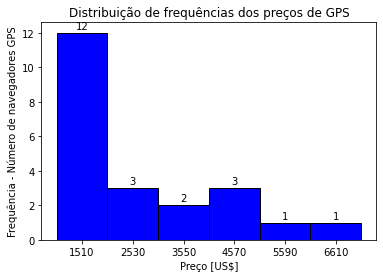

In [33]:
# construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='blue', edgecolor='black', grid=False)
# atribuindo outros valor usando o set
histograma.set(xlabel='Preço [US$]', ylabel='Frequência - Número de navegadores GPS',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = dist_freq['Pontos médios'],
               yticks = range(0,dist_freq['Frequência'].max()+2,2))
#obter informações das barras
barras = histograma.patches
#separar informações das frequencias
freqs = dist_freq['Frequência']
#loop para cada barra
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(barra.get_x()+barra.get_width()/2, altura+0.1,
                    freq, ha='center', va='bottom')

Construção Histograma de Frequência Relativa

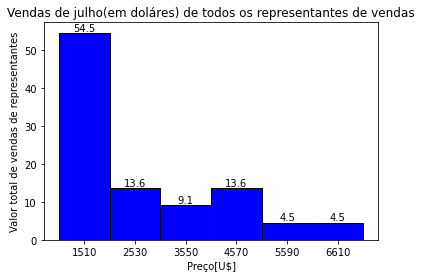

In [34]:
import numpy as np
histograma = data.hist(bins=[inter.left for inter in intervalos]+[dist_freq["Classe"][n_classes-1].right],
                       color='Blue',edgecolor='Black',grid=False,weights=np.ones_like(data)*100/len(data))
histograma.set(xlabel = "Preço[U$]", ylabel = 'Valor total de vendas de representantes', 
               title = 'Vendas de julho(em doláres) de todos os representantes de vendas',
               xticks = dist_freq["Pontos médios"])
barras = histograma.patches
freqs = dist_freq["Frequência Relativa"]
for barra, freq in zip(barras,freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}'
    histograma.text(barra.get_x()+barra.get_width()/2,altura,texto_freq,ha='center',va='bottom')

Construção do Gráfico de Ogiva

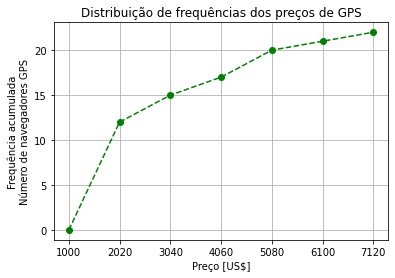

In [35]:
# Construção dos dados
x_data = [dist_freq['Classe'][0].left] + [ext.right for ext in dist_freq['Classe']]
y_data = [0] + list(dist_freq['Frequência acumulada'])
# Plotagem da ogiva, com diversos atributos
ogiva = plt
ogiva.plot(x_data, y_data,'go--')
ogiva.xlabel('Preço [US$]')
ogiva.ylabel('Frequência acumulada\nNúmero de navegadores GPS')
ogiva.title('Distribuição de frequências dos preços de GPS')
ogiva.xticks(x_data)
ogiva.grid()

Maior Frequência -> 54,5% -> Classe 1
Menor Frequência -> 4,5% -> Classe 5 e 6

 Exercício 6 Conjunto de dados 2

Construção da tabela

In [36]:
#conjunto de dados 1
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
data = pd.Series([35,51,44,42,37,38,36,44,43,40,40,32,39,41,42,39,40,46,37,35,41])
v_max = data.max()
v_min = data.min()
n_classes = 5
dist_freq = data.value_counts(bins = n_classes).sort_index()
dist_freq = pd.DataFrame(dist_freq)
dist_freq = dist_freq.reset_index()
dist_freq.columns = ['Classe','Frequência']
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start = v_min, end = v_max+amplitude, freq = amplitude)
dist_freq["Classe"] = intervalos
pts_medios = [inter.mid for inter in intervalos]
dist_freq["Pontos médios"] = pts_medios
observacoes = len(data)
dist_freq["Frequência Relativa"] = dist_freq["Frequência"]/observacoes
dist_freq["Frequência acumulada"] = dist_freq["Frequência"].cumsum()
display(dist_freq)

,Classe,Frequência,Pontos médios,Frequência Relativa,Frequência acumulada
0,"(32, 36]",3,34.0,0.142857,3
1,"(36, 40]",6,38.0,0.285714,9
2,"(40, 44]",8,42.0,0.380952,17
3,"(44, 48]",3,46.0,0.142857,20
4,"(48, 52]",1,50.0,0.047619,21


Construção do Histograma Frequência

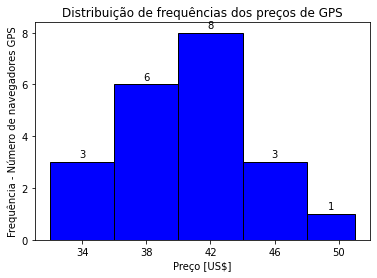

In [37]:
# construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='blue', edgecolor='black', grid=False)
# atribuindo outros valor usando o set
histograma.set(xlabel='Preço [US$]', ylabel='Frequência - Número de navegadores GPS',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = dist_freq['Pontos médios'],
               yticks = range(0,dist_freq['Frequência'].max()+2,2))
#obter informações das barras
barras = histograma.patches
#separar informações das frequencias
freqs = dist_freq['Frequência']
#loop para cada barra
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(barra.get_x()+barra.get_width()/2, altura+0.1,
                    freq, ha='center', va='bottom')

Construção do Histograma de Frequência Relativa

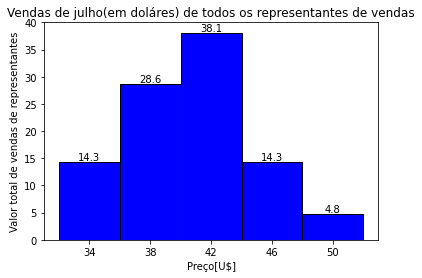

In [38]:
import numpy as np
histograma = data.hist(bins=[inter.left for inter in intervalos]+[dist_freq["Classe"][n_classes-1].right],
                       color='Blue',edgecolor='Black',grid=False,weights=np.ones_like(data)*100/len(data))
histograma.set(xlabel = "Preço[U$]", ylabel = 'Valor total de vendas de representantes', 
               title = 'Vendas de julho(em doláres) de todos os representantes de vendas',
               xticks = dist_freq["Pontos médios"])
barras = histograma.patches
freqs = dist_freq["Frequência Relativa"]
for barra, freq in zip(barras,freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}'
    histograma.text(barra.get_x()+barra.get_width()/2,altura,texto_freq,ha='center',va='bottom')

Cosntrução da Ogiva

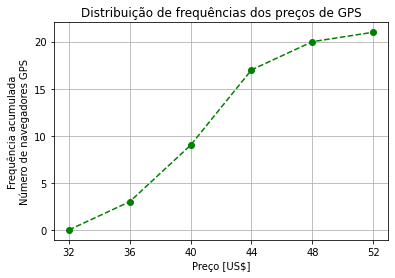

In [39]:
# Construção dos dados
x_data = [dist_freq['Classe'][0].left] + [ext.right for ext in dist_freq['Classe']]
y_data = [0] + list(dist_freq['Frequência acumulada'])
# Plotagem da ogiva, com diversos atributos
ogiva = plt
ogiva.plot(x_data, y_data,'go--')
ogiva.xlabel('Preço [US$]')
ogiva.ylabel('Frequência acumulada\nNúmero de navegadores GPS')
ogiva.title('Distribuição de frequências dos preços de GPS')
ogiva.xticks(x_data)
ogiva.grid()

Maior Frequência -> 38,1% -> Classe 3
Menor FrequÊncia -> 4,8% -> Classe 5

Exercício 6 Conjunto de Dados 3

Costrução da Tabela

In [40]:
#conjunto de dados 1
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
data = pd.Series([507,389,305,291,336,310,514,442,373,428,387,454,323,441,388,426,411,382,320,450,309,416,359,388,307,337,469,351,422,413])
v_max = data.max()
v_min = data.min()
n_classes = 8
dist_freq = data.value_counts(bins = n_classes).sort_index()
dist_freq = pd.DataFrame(dist_freq)
dist_freq = dist_freq.reset_index()
dist_freq.columns = ['Classe','Frequência']
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start = v_min, end = v_max+amplitude, freq = amplitude)
dist_freq["Classe"] = intervalos
pts_medios = [inter.mid for inter in intervalos]
dist_freq["Pontos médios"] = pts_medios
observacoes = len(data)
dist_freq["Frequência Relativa"] = dist_freq["Frequência"]/observacoes
dist_freq["Frequência acumulada"] = dist_freq["Frequência"].cumsum()
display(dist_freq)

,Classe,Frequência,Pontos médios,Frequência Relativa,Frequência acumulada
0,"(291, 319]",5,305.0,0.166667,5
1,"(319, 347]",4,333.0,0.133333,9
2,"(347, 375]",3,361.0,0.100000,12
3,"(375, 403]",5,389.0,0.166667,17
4,"(403, 431]",6,417.0,0.200000,23
5,"(431, 459]",4,445.0,0.133333,27
6,"(459, 487]",1,473.0,0.033333,28
7,"(487, 515]",2,501.0,0.066667,30


Construção do Histograma de Frequência

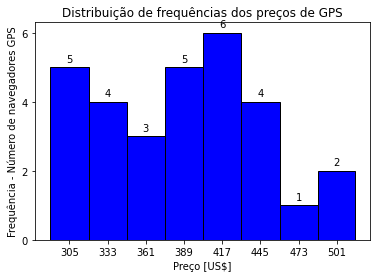

In [41]:
# construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='blue', edgecolor='black', grid=False)
# atribuindo outros valor usando o set
histograma.set(xlabel='Preço [US$]', ylabel='Frequência - Número de navegadores GPS',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = dist_freq['Pontos médios'],
               yticks = range(0,dist_freq['Frequência'].max()+2,2))
#obter informações das barras
barras = histograma.patches
#separar informações das frequencias
freqs = dist_freq['Frequência']
#loop para cada barra
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(barra.get_x()+barra.get_width()/2, altura+0.1,
                    freq, ha='center', va='bottom')

Cosntrução do Histograma de Frequência Relativa

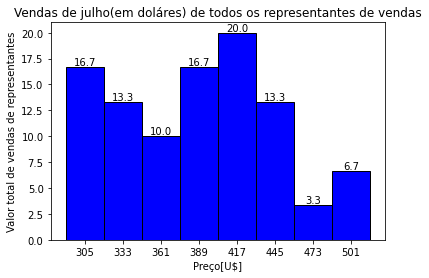

In [42]:
import numpy as np
histograma = data.hist(bins=[inter.left for inter in intervalos]+[dist_freq["Classe"][n_classes-1].right],
                       color='Blue',edgecolor='Black',grid=False,weights=np.ones_like(data)*100/len(data))
histograma.set(xlabel = "Preço[U$]", ylabel = 'Valor total de vendas de representantes', 
               title = 'Vendas de julho(em doláres) de todos os representantes de vendas',
               xticks = dist_freq["Pontos médios"])
barras = histograma.patches
freqs = dist_freq["Frequência Relativa"]
for barra, freq in zip(barras,freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}'
    histograma.text(barra.get_x()+barra.get_width()/2,altura,texto_freq,ha='center',va='bottom')

Cosntrução da Ogiva

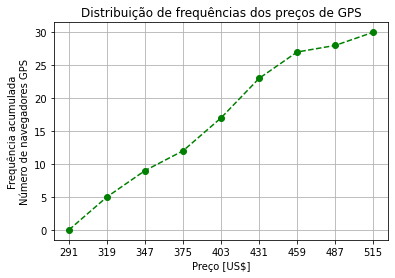

In [43]:
# Construção dos dados
x_data = [dist_freq['Classe'][0].left] + [ext.right for ext in dist_freq['Classe']]
y_data = [0] + list(dist_freq['Frequência acumulada'])
# Plotagem da ogiva, com diversos atributos
ogiva = plt
ogiva.plot(x_data, y_data,'go--')
ogiva.xlabel('Preço [US$]')
ogiva.ylabel('Frequência acumulada\nNúmero de navegadores GPS')
ogiva.title('Distribuição de frequências dos preços de GPS')
ogiva.xticks(x_data)
ogiva.grid()

Maior Frequência -> 20% -> Classe 5
Menor Frequência -> 3,3% -> Classe 7

Exercício 6 Conjunto de Dados 4

Cosntrução da Tabela

In [44]:
#conjunto de dados 1
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil
data = pd.Series([1595,1472,1820,1580,1804,1635,1959,2020,1480,1250,2083,1522,1306,1572,1778,2296,1445,1716,1618,1824])
v_max = data.max()
v_min = data.min()
n_classes = 8
dist_freq = data.value_counts(bins = n_classes).sort_index()
dist_freq = pd.DataFrame(dist_freq)
dist_freq = dist_freq.reset_index()
dist_freq.columns = ['Classe','Frequência']
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start = v_min, end = v_max+amplitude, freq = amplitude)
dist_freq["Classe"] = intervalos
pts_medios = [inter.mid for inter in intervalos]
dist_freq["Pontos médios"] = pts_medios
observacoes = len(data)
dist_freq["Frequência Relativa"] = dist_freq["Frequência"]/observacoes
dist_freq["Frequência acumulada"] = dist_freq["Frequência"].cumsum()
display(dist_freq)

,Classe,Frequência,Pontos médios,Frequência Relativa,Frequência acumulada
0,"(1250, 1381]",2,1315.5,0.10,2
1,"(1381, 1512]",3,1446.5,0.15,5
2,"(1512, 1643]",6,1577.5,0.30,11
3,"(1643, 1774]",1,1708.5,0.05,12
4,"(1774, 1905]",4,1839.5,0.20,16
5,"(1905, 2036]",2,1970.5,0.10,18
6,"(2036, 2167]",1,2101.5,0.05,19
7,"(2167, 2298]",1,2232.5,0.05,20


Construção do Histograma de Frequência

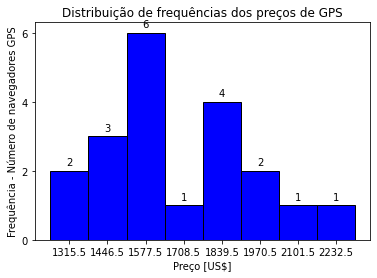

In [45]:
# construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='blue', edgecolor='black', grid=False)
# atribuindo outros valor usando o set
histograma.set(xlabel='Preço [US$]', ylabel='Frequência - Número de navegadores GPS',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = dist_freq['Pontos médios'],
               yticks = range(0,dist_freq['Frequência'].max()+2,2))
#obter informações das barras
barras = histograma.patches
#separar informações das frequencias
freqs = dist_freq['Frequência']
#loop para cada barra
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(barra.get_x()+barra.get_width()/2, altura+0.1,
                    freq, ha='center', va='bottom')

Construção do Histograma de Frequência Relaiva

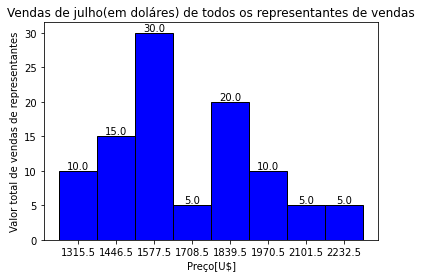

In [46]:
import numpy as np
histograma = data.hist(bins=[inter.left for inter in intervalos]+[dist_freq["Classe"][n_classes-1].right],
                       color='Blue',edgecolor='Black',grid=False,weights=np.ones_like(data)*100/len(data))
histograma.set(xlabel = "Preço[U$]", ylabel = 'Valor total de vendas de representantes', 
               title = 'Vendas de julho(em doláres) de todos os representantes de vendas',
               xticks = dist_freq["Pontos médios"])
barras = histograma.patches
freqs = dist_freq["Frequência Relativa"]
for barra, freq in zip(barras,freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}'
    histograma.text(barra.get_x()+barra.get_width()/2,altura,texto_freq,ha='center',va='bottom')

Construção da Ogiva

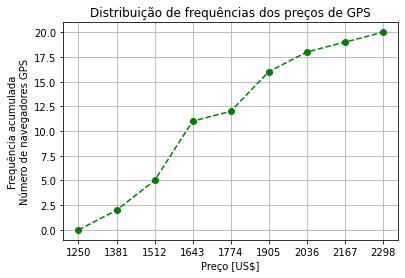

In [47]:
# Construção dos dados
x_data = [dist_freq['Classe'][0].left] + [ext.right for ext in dist_freq['Classe']]
y_data = [0] + list(dist_freq['Frequência acumulada'])
# Plotagem da ogiva, com diversos atributos
ogiva = plt
ogiva.plot(x_data, y_data,'go--')
ogiva.xlabel('Preço [US$]')
ogiva.ylabel('Frequência acumulada\nNúmero de navegadores GPS')
ogiva.title('Distribuição de frequências dos preços de GPS')
ogiva.xticks(x_data)
ogiva.grid()

Maior Frequência -> 30% -> Classe 3
Menor Frequência -> 5% -> Classe 4,7 e 8